Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imagenes

In [ ]:
data_dir_str = "/content/drive/MyDrive/Proyecto_mangocateros/Proyecto_Mango/unidas/Azucar"
data_dir = pathlib.Path(data_dir_str)

In [ ]:
Fisiopatologias = (list(data_dir.glob('Enfermo/*.JPG'))+
                   list(data_dir.glob('Enfermo/*.jpg'))+
                   list(data_dir.glob('Enfermo/*.png'))+
                   list(data_dir.glob('Enfermo/*.jpeg')))

Sanas = (list(data_dir.glob('Sanos/*.JPG'))+
         list(data_dir.glob('Sanos/*.jpg'))+
         list(data_dir.glob('Sanos/*.png'))+
            list(data_dir.glob('Sanos/*.jpeg')))

print(len(Fisiopatologias))
print(len(Sanas))

717
282


In [ ]:
batch_size = 32 #Número de ejemplos que se pasan al algoritmo en cada iteración de aprendizaje
img_height = 200
img_width = 200

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 999 files belonging to 2 classes.
Using 800 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Enfermo', 'Sanos']


In [ ]:
print(type(train_ds)) #lista de tuplas de forma (batch images, labels)
tensor1,labels1=next(iter(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
print(tensor1) #Relaciones multilineales
print(labels1)

tf.Tensor(
[[[[194.7852   198.7852   199.7852  ]
   [196.58     200.58     201.58    ]
   [200.       204.       205.      ]
   ...
   [212.58     213.58     207.58    ]
   [210.24007  211.24007  205.24007 ]
   [210.       211.       205.      ]]

  [[191.5292   195.5292   196.5292  ]
   [195.7744   199.7744   200.7744  ]
   [197.596    201.596    202.596   ]
   ...
   [210.       211.       205.      ]
   [209.95322  210.95322  204.95322 ]
   [211.30444  212.30444  206.30444 ]]

  [[194.73201  198.73201  199.73201 ]
   [193.9      197.9      198.9     ]
   [196.87     200.87     201.87    ]
   ...
   [213.       214.       208.      ]
   [209.9      210.9      204.9     ]
   [209.05405  210.05405  204.05405 ]]

  ...

  [[182.12599  181.12599  176.12599 ]
   [185.       186.       178.      ]
   [182.90015  183.90015  175.90015 ]
   ...
   [206.90015  207.90015  199.90015 ]
   [206.       207.       199.      ]
   [205.12611  206.12611  198.12611 ]]

  [[186.44443  187.44443  179.4444

Sanos


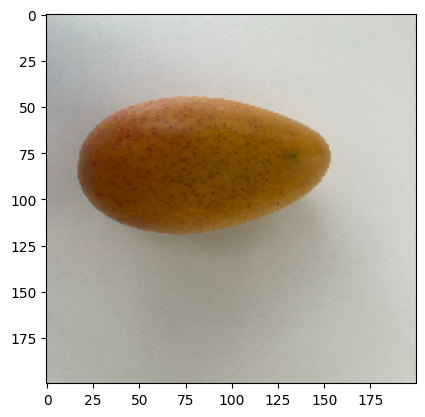

In [ ]:
plt.imshow(tensor1[0].numpy().astype("uint8"))
print(class_names[labels1[0]])

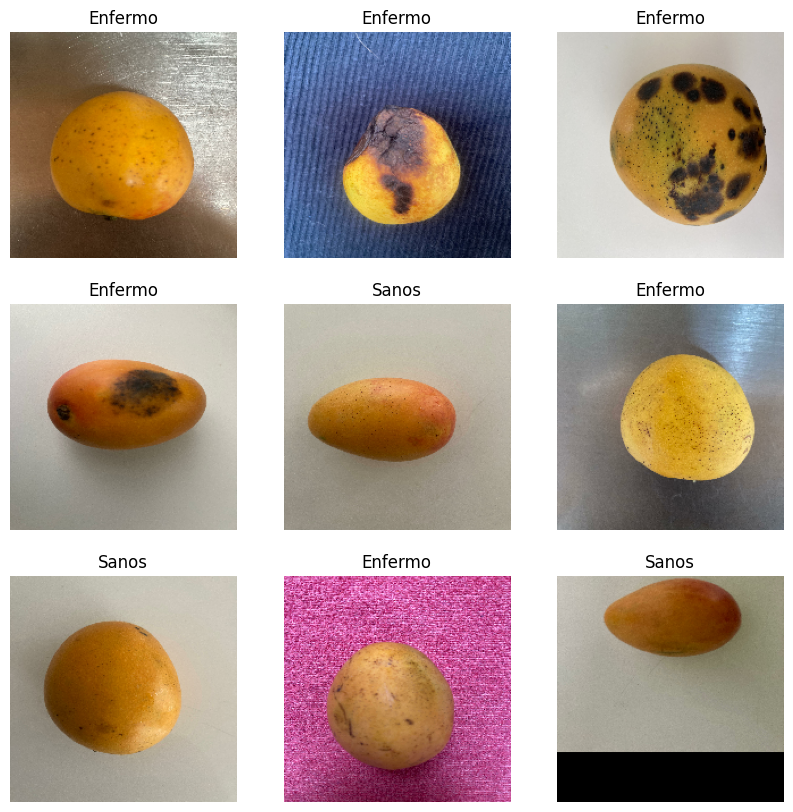

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) #uint8 array de enteros sin signo de 8bits.Inicia en 0
        plt.title(class_names[labels[i]])
        plt.axis("off")

0.0     0.88384366


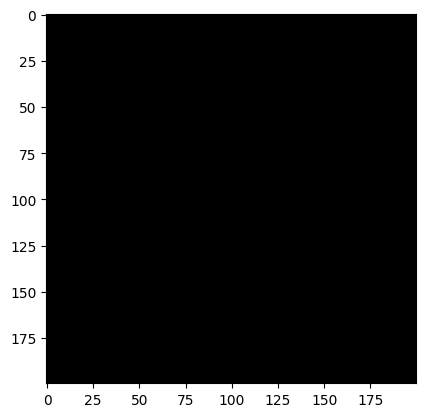

In [ ]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image),'   ', np.max(first_image))
plt.imshow(first_image.numpy().astype("uint8"))

Configuración del dataset

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE #Corregir data?

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(100, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(130, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 100, 100, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 100)     115300    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 100)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 250000)           

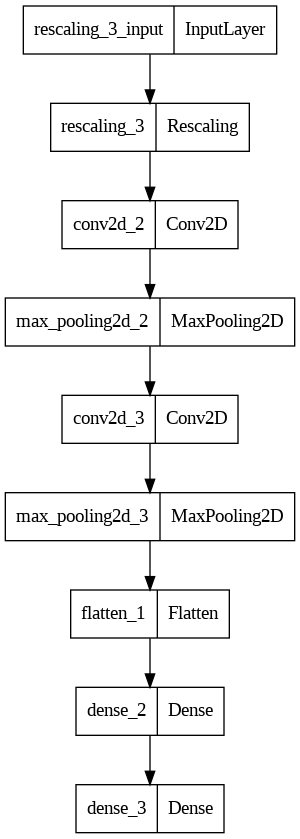

In [ ]:
from keras.utils import plot_model

plot_model(model)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

#Objeto tipo history: encapsula el string(secuencia de caracteres) que se muestra en un campo de historial de un registro de datos

Epoch 1/10
25/25 [==============================] - 449s 14s/step - loss: 1.4965 - accuracy: 0.6687 - val_loss: 0.5852 - val_accuracy: 0.7286
Epoch 2/10
25/25 [==============================] - 323s 13s/step - loss: 0.5036 - accuracy: 0.7600 - val_loss: 0.4258 - val_accuracy: 0.7940
Epoch 3/10
25/25 [==============================] - 287s 11s/step - loss: 0.4130 - accuracy: 0.8238 - val_loss: 0.4328 - val_accuracy: 0.7789
Epoch 4/10
25/25 [==============================] - 305s 12s/step - loss: 0.3011 - accuracy: 0.8662 - val_loss: 0.3487 - val_accuracy: 0.8744
Epoch 5/10
25/25 [==============================] - 298s 12s/step - loss: 0.2428 - accuracy: 0.8788 - val_loss: 0.3571 - val_accuracy: 0.8543
Epoch 6/10
25/25 [==============================] - 294s 12s/step - loss: 0.1941 - accuracy: 0.9275 - val_loss: 0.3015 - val_accuracy: 0.8693
Epoch 7/10
25/25 [==============================] - 282s 11s/step - loss: 0.1522 - accuracy: 0.9425 - val_loss: 0.4187 - val_accuracy: 0.8744
Epoch 

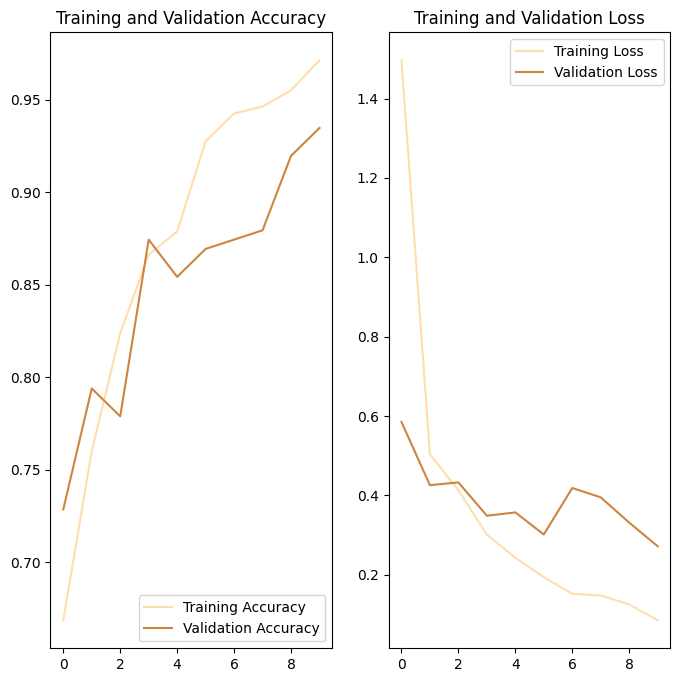

In [ ]:
#history.history es un diccionario que contiene los valores de la función de perdida y las métricas escogidas para
#cada conjunto de datos y cada época como listas.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy',c='navajowhite')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',c='peru')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss',c='navajowhite')
plt.plot(epochs_range, val_loss, label='Validation Loss',c='peru')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img1 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Enfermedad.JPG', target_size=(img_height, img_width)
)
img2= tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Insectos.png', target_size=(img_height, img_width)
)
img3 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Sanos.jpeg', target_size=(img_height, img_width)
)

In [ ]:
img_array1 = tf.keras.utils.img_to_array(img1)
img_array1 = tf.expand_dims(img_array1, 0) # Create a batch

predictions = model.predict(img_array1)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Fisiopato

1/1 [==============================] - 0s 253ms/step
This image most likely belongs to Enfermo with a 57.70 percent confidence.


In [ ]:
img_array2 = tf.keras.utils.img_to_array(img2)
img_array2 = tf.expand_dims(img_array2, 0)

predictions = model.predict(img_array2)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Insecto

1/1 [==============================] - 0s 158ms/step
This image most likely belongs to Enfermo with a 76.49 percent confidence.


In [ ]:
img_array3 = tf.keras.utils.img_to_array(img3)
img_array3 = tf.expand_dims(img_array3, 0) # Create a batch

predictions = model.predict(img_array3)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Sano

1/1 [==============================] - 0s 195ms/step
This image most likely belongs to Sanos with a 99.40 percent confidence.


7/7 [==============================] - 18s 3s/step


Text(50.722222222222214, 0.5, 'Real')

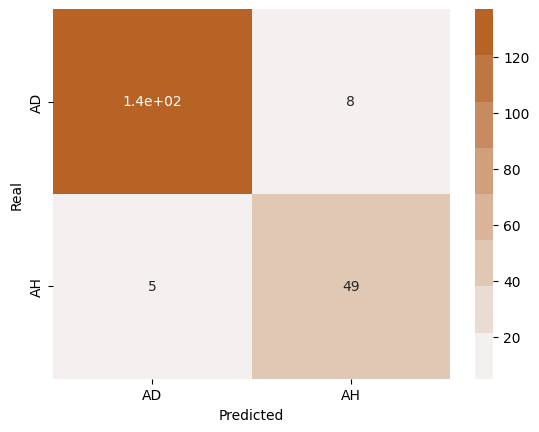

In [ ]:
predict = model.predict(val_ds).argmax(axis=1)

import pandas as pd
data = pd.DataFrame()
for images, labels in val_ds:
    data1 = pd.DataFrame(labels)
    data = pd.concat([data,data1],axis=0)

data.columns = ['Real']
data = data.reset_index(drop=True)

pred = pd.DataFrame(predict)
pred.columns = ['Pred']
data_fin = pd.concat([data,pred],axis=1)

#data_fin = data_fin.replace({0:'AD',1:'AH'})

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

x_axis_labels = ['AD','AH']
y_axis_labels = ['AD','AH']

sns.heatmap(confusion_matrix(data_fin['Real'],data_fin['Pred']),annot=True,
            cmap=sns.light_palette("xkcd:copper", 8), xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Real')